In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
'''
%pip install requests
%pip install StringIO
'''

'\n%pip install requests\n%pip install StringIO\n'

In [3]:
import requests

In [4]:
import io

In [5]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Use requests to get the information in text form
source = requests.get(url).text

# Use StringIO to avoid an IO error with pandas
poll_data = io.StringIO(source) 

In [6]:
polldf=pd.read_csv(poll_data)

In [7]:
polldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 78.0+ KB


In [8]:
polldf.drop('Question Text',axis=1,inplace=True)
polldf.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,1


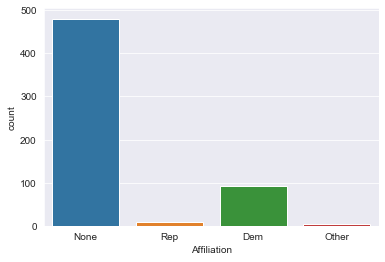

In [9]:
sns.countplot('Affiliation', data=polldf)

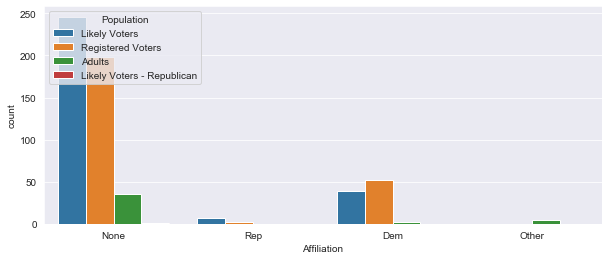

In [10]:
plt.figure(figsize=(10,4))
sns.countplot('Affiliation', data=polldf,hue='Population')

In [11]:
avg=pd.DataFrame(polldf.mean())
avg.drop(['Number of Observations', 'Question Iteration'], axis=0, inplace=True)

In [12]:
std=pd.DataFrame(polldf.std())
std.drop(['Number of Observations', 'Question Iteration'], axis=0, inplace=True)

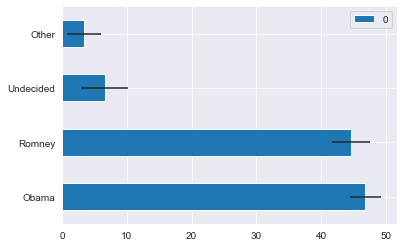

In [13]:
#plotting with standard deviation in mind
avg.plot(xerr=std,kind='barh',)

In [14]:
avg_std_df=pd.concat([avg,std],axis=1)
avg_std_df.columns=['Avg','Std']
avg_std_df.head()

,Avg,Std
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


In [15]:
#since other voters wont make huge sense for deciding between obama and romney, we'll remove em
avg_std_df.drop('Other',axis=0,inplace=True)

In [16]:
avg_std_df.head()
#now we try to understand how the undecided voters changed the curve

,Avg,Std
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


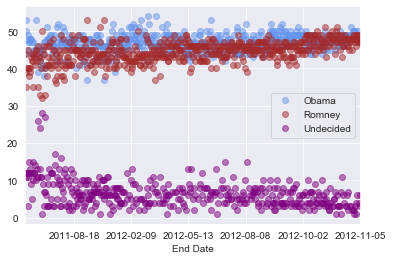

In [17]:
#before doing that, we will try to understand the changes in the voter sentiment through time as a time series
#analyses

polldf.plot('End Date',y=['Obama','Romney','Undecided'], alpha=0.5,linestyle='', marker='o', 
            color=['cornflowerblue','Brown','purple'] )
plt.gca().invert_xaxis()# to change the order of the dates plotted

In [ ]:
#for better understanding, we should actually try and plot the difference as the days go by
from datetime import datetime

In [18]:
diffdf=polldf.groupby('Start Date').mean()
#instead of using reset_index later on, we can use as_index=False in groupby statement

In [19]:
diffdf['Difference']=(diffdf.Obama-diffdf.Romney)/100

In [20]:
diffdf.drop(['Number of Observations','Other','Question Iteration'],axis=1,inplace=True)

In [21]:
diffdf.reset_index(inplace=True)

In [32]:
diffdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
Start Date    357 non-null object
Obama         357 non-null float64
Romney        357 non-null float64
Undecided     296 non-null float64
Difference    357 non-null float64
dtypes: float64(4), object(1)
memory usage: 14.1+ KB


In [33]:
diffdf.head()

,Start Date,Obama,Romney,Undecided,Difference
0,2009-03-13,44.0,44.0,12.0,0.00
1,2009-04-17,50.0,39.0,11.0,0.11
2,2009-05-14,53.0,35.0,12.0,0.18
3,2009-06-12,48.0,40.0,12.0,0.08
4,2009-07-15,49.0,40.0,11.0,0.09


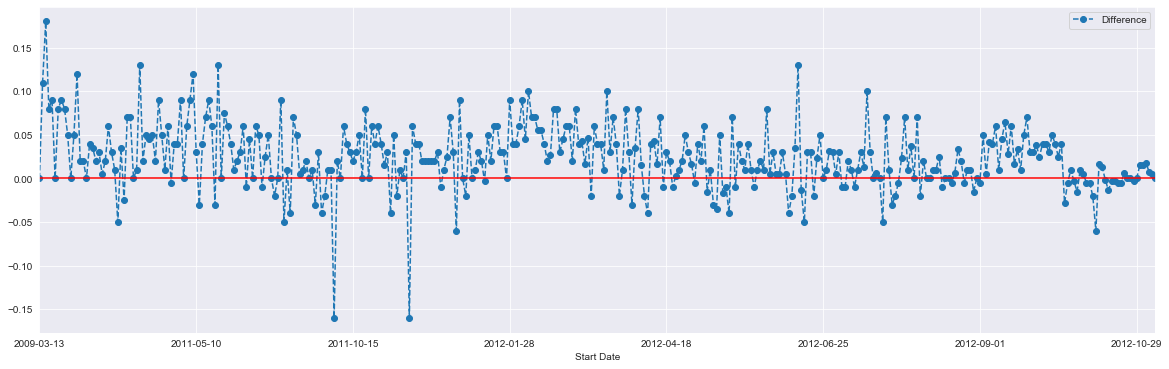

In [22]:
diffdf.plot('Start Date', 'Difference', marker='o', linestyle='--', figsize=(20,6))
plt.axhline(0, color='red')

In [24]:
#now we try to figure out if the presidential debates had any causal effect on the outcome
#since the debates usually take place in the month of october, we find the rows in diffdf which was in the month of
#october

rowcounter=0
october=[]

for date in diffdf['Start Date']:
    if date[0:7]=='2012-10':
        october.append(rowcounter)
        rowcounter+=1
    else:
        rowcounter+=1

In [28]:
 print (min(october),max(october))

325 352


In [30]:
diffdf.iloc[325]

Start Date    2012-10-01
Obama               48.5
Romney                46
Undecided              3
Difference         0.025
Name: 325, dtype: object

In [31]:
diffdf.iloc[352]

Start Date    2012-10-31
Obama                 48
Romney              46.5
Undecided              4
Difference         0.015
Name: 352, dtype: object

In [50]:
# also there were 3 debates on oct 3, oct 11 and oct 22
dates=[]
for x in range(325, 352):
    if diffdf.iloc[x][0]=='2012-10-03':
        dates.append(x)
    elif diffdf.iloc[x][0]=='2012-10-11':
        dates.append(x)
    elif diffdf.iloc[x][0]=='2012-10-22':
        dates.append(x)

In [51]:
dates

[333, 343]

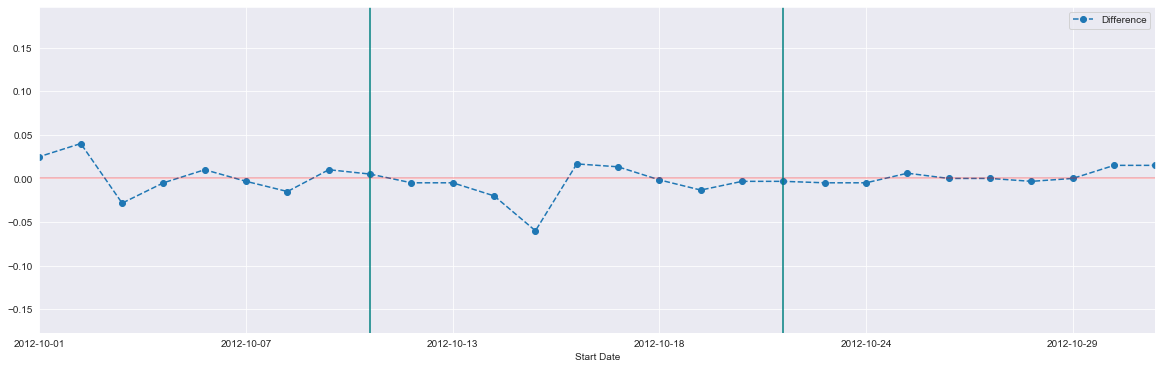

In [53]:
#we find that we dont have the information for oct 3
diffdf.plot('Start Date', 'Difference', marker='o', linestyle='--', figsize=(20,6),xlim=(325,352))
plt.axhline(0, color='red',alpha=0.3) 
plt.axvline(x=333,color='teal')#oct 11
plt.axvline(x=343,color='teal')#oct 22

In [76]:
#Election Donor dataset
dondf=pd.read_csv('Election_Donor_Data.csv')

In [71]:
dondf.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [72]:
dondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [73]:
vc=dondf.receipt_desc.value_counts()
vc[vc>30]

Refund                                                 6075
REDESIGNATION TO GENERAL                               1394
REDESIGNATION FROM PRIMARY                             1372
REATTRIBUTION TO SPOUSE                                1317
REATTRIBUTION FROM SPOUSE                              1302
SEE REATTRIBUTION                                       951
REATTRIBUTION / REDESIGNATION REQUESTED                 658
REATTRIBUTION REQUESTED                                 387
REATTRIBUTION / REDESIGNATION REQUESTED (AUTOMATIC)     199
REATTRIBUTION BELOW                                     112
REATTRIBUTED                                            111
REATTRIBUTED BELOW                                      111
Name: receipt_desc, dtype: int64

In [79]:
dondf.cand_id.value_counts()

P80003338    593746
P80000748    143757
P80003353    107229
P60003654     47679
P20002721     46559
P00003608     20107
P20003281     13575
P20002978     13140
P20002523      5920
P20002556      4555
P20003067      4156
P20002671      1234
P20003109        74
Name: cand_id, dtype: int64

In [81]:
donmean=dondf.contb_receipt_amt.mean()
donstd=dondf.contb_receipt_amt.std()

In [85]:
print(donmean,donstd)
#the mean is small with a huge std

298.2351500951093 3749.666723269043


In [91]:
receiptamount=dondf.contb_receipt_amt.copy()
receiptamount.sort_values()
#the -ve values are the refunds which we don't really care about

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

In [101]:
receiptamount=receiptamount[receiptamount>0]
receiptamount.sort_values(ascending=False)

325136    2014490.51
326651    1944042.43
344539    1679114.65
344419    1511192.17
319478     526246.17
             ...    
329896          0.01
324596          0.01
335352          0.01
335407          0.01
335573          0.01
Name: contb_receipt_amt, Length: 991475, dtype: float64

In [102]:
receiptamount.value_counts().iloc[:10]

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

(0, 50000)

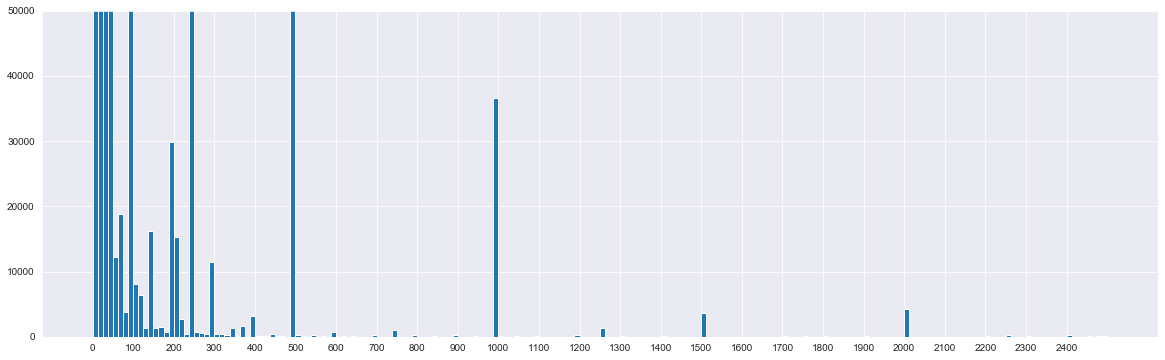

In [110]:
#checking if donations are made in round numbers
comdonations=receiptamount[receiptamount<2500]
plt.figure(figsize=(20,6))
comdonations.hist(bins=200)
plt.xticks(np.arange(0, 2500, step=100))
plt.ylim(0,50000) #for a zoomed in view
#we see peaks at round numbers

In [ ]:
# donations by part affiliation

In [114]:
dondf.cand_nm.unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [115]:
affiliation={'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [120]:
dondf['party']= dondf['cand_nm'].map(affiliation)

In [123]:
dondf.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [126]:
dondf=dondf[dondf['contb_receipt_amt']>0]

In [128]:
dondf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991475 entries, 0 to 1001730
Data columns (total 17 columns):
cmte_id              991475 non-null object
cand_id              991475 non-null object
cand_nm              991475 non-null object
contbr_nm            991475 non-null object
contbr_city          991457 non-null object
contbr_st            991471 non-null object
contbr_zip           991373 non-null object
contbr_employer      983833 non-null object
contbr_occupation    989133 non-null object
contb_receipt_amt    991475 non-null float64
contb_receipt_dt     991475 non-null object
receipt_desc         5219 non-null object
memo_cd              89461 non-null object
memo_text            94274 non-null object
form_tp              991475 non-null object
file_num             991475 non-null int64
party                991475 non-null object
dtypes: float64(1), int64(1), object(15)
memory usage: 136.2+ MB


In [146]:
#total amount received by a candidate
dondf.groupby('cand_nm',as_index=False)[['contb_receipt_amt']].sum().sort_values('contb_receipt_amt',ascending=False)

,cand_nm,contb_receipt_amt
6,"Obama, Barack",1.358774e+08
11,"Romney, Mitt",8.833591e+07
7,"Paul, Ron",2.100962e+07
9,"Perry, Rick",2.030575e+07
2,"Gingrich, Newt",1.283277e+07
12,"Santorum, Rick",1.104316e+07
1,"Cain, Herman",7.101082e+06
8,"Pawlenty, Timothy",6.004819e+06
3,"Huntsman, Jon",3.330373e+06
0,"Bachmann, Michelle",2.711439e+06


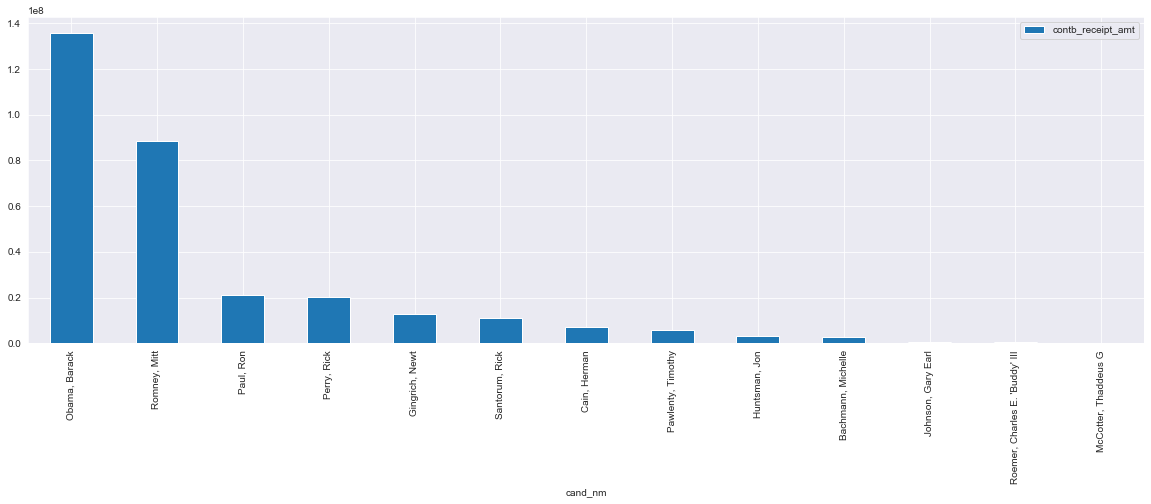

In [155]:
dondf.groupby('cand_nm',as_index=False)[['contb_receipt_amt']].sum().sort_values('contb_receipt_amt',ascending=False).plot(x='cand_nm',kind='bar',figsize=(20,6))

In [149]:
#number of people donating
dondf.groupby('cand_nm',as_index=False)[['contb_receipt_amt']].count().sort_values('contb_receipt_amt',ascending=False)

,cand_nm,contb_receipt_amt
6,"Obama, Barack",589127
7,"Paul, Ron",143161
11,"Romney, Mitt",105155
2,"Gingrich, Newt",46883
12,"Santorum, Rick",46245
1,"Cain, Herman",20052
0,"Bachmann, Michelle",13082
9,"Perry, Rick",12709
10,"Roemer, Charles E. 'Buddy' III",5844
3,"Huntsman, Jon",4066


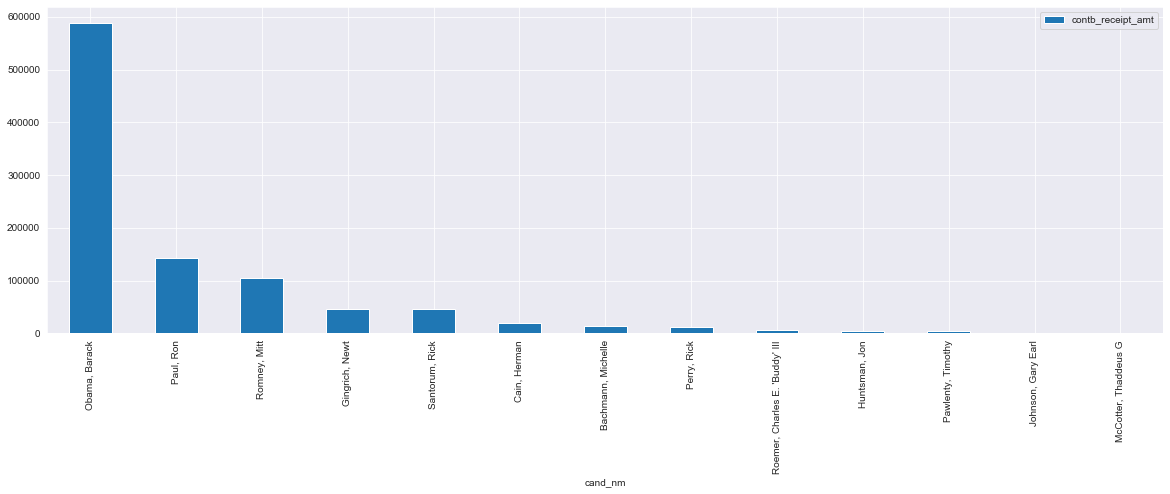

In [156]:

dondf.groupby('cand_nm',as_index=False)[['contb_receipt_amt']].count().sort_values('contb_receipt_amt',ascending=False).plot(x='cand_nm',kind='bar',figsize=(20,6))

In [167]:
#trying agg function
dondf.groupby(['cand_nm','party'],as_index=False).agg({'contb_receipt_amt':'count'})

,cand_nm,party,contb_receipt_amt
0,"Bachmann, Michelle",Republican,13082
1,"Cain, Herman",Republican,20052
2,"Gingrich, Newt",Republican,46883
3,"Huntsman, Jon",Republican,4066
4,"Johnson, Gary Earl",Republican,1234
5,"McCotter, Thaddeus G",Republican,73
6,"Obama, Barack",Democrat,589127
7,"Paul, Ron",Republican,143161
8,"Pawlenty, Timothy",Republican,3844
9,"Perry, Rick",Republican,12709


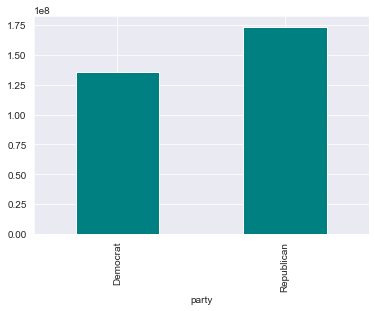

In [180]:
#donations split by party
dondf.groupby('party',as_index=False)[['contb_receipt_amt']].sum().plot(x='party',kind='bar',color=['teal'],legend=False)

In [203]:
occudf=dondf.pivot_table('contb_receipt_amt','contbr_occupation','party',aggfunc='sum')
occudf.head()

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [204]:
occudf.shape

(45067, 2)

In [205]:
#since we have over 45000 different jobs of people coming forward to donate, we'll take the ones who donated more than
# 1 million

occudf=occudf[occudf.sum(axis=1)>1000000]
occudf.shape

(31, 2)

In [208]:
occudf=occudf.drop(['INFORMATION REQUESTED','INFORMATION REQUESTED PER BEST EFFORTS'])
occudf.shape

(29, 2)

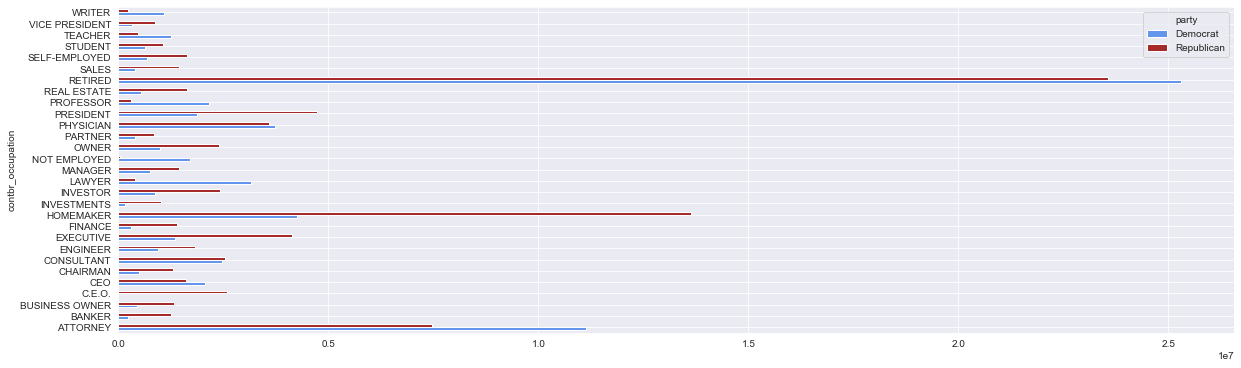

In [210]:
occudf.plot(kind='barh',color=['cornflowerblue','brown'],figsize=(20,6))

In [214]:
#we find that we have two ceo values available
occudf.loc['CEO']=occudf.loc['CEO']+occudf.loc['C.E.O.']
occudf.drop('C.E.O.',inplace=True)

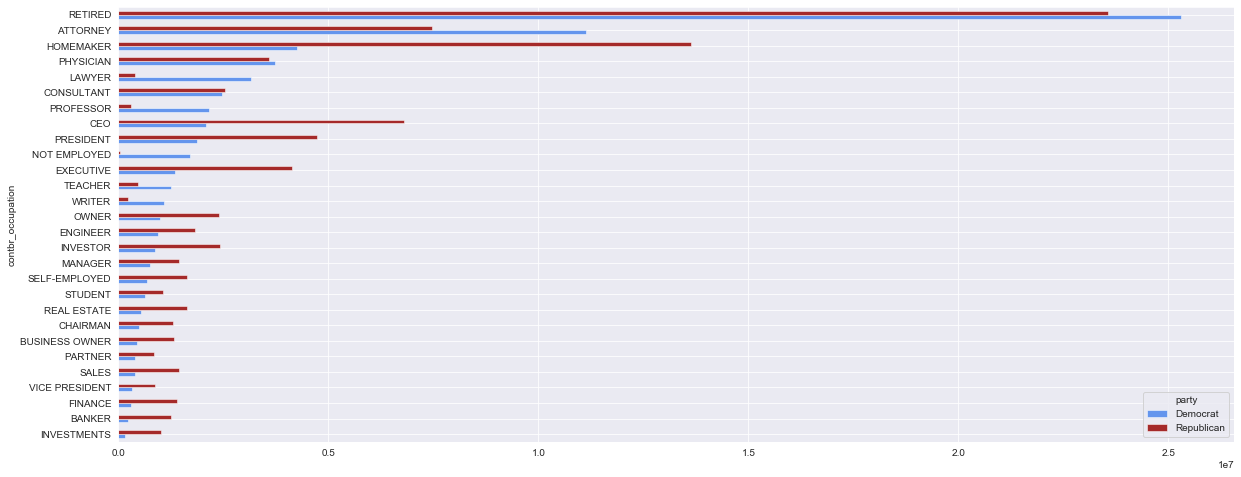

In [221]:
occudf.sort_values('Democrat').plot(kind='barh',linewidth=0.5,color=['cornflowerblue','brown'],figsize=(20,8))